In [42]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [44]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**As we can see that the date added column has object data type but it should be of datetime datatype**

In [45]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [46]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Now we have null values present in our dateset, so we have to treat them**

In [47]:
df = df.dropna(subset = ["date_added", "duration"])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('No data')
df['director'] = df['director'].fillna("Incomplete Data")

In [48]:
df.isnull().sum()       #now our data is almost cleaned

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [49]:
df['listed_in']       #so this listed in column name should be genre 

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8794, dtype: object

In [50]:
df = df.rename(columns={'listed_in':'Genres'})
df['Genres'] = df['Genres'].apply(lambda s: s.split(",")[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Incomplete Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Incomplete Data,No data,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Incomplete Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


# 1. What is the ratio of tv shows and movies added in netflix?

In [51]:
df['type'].value_counts()

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

In [52]:
fig = px.pie(df, names='type', title="Netflix Content Distribution", hole=0.5)
fig.show()

***Using plotly express***

In [53]:
x = df.groupby('type')['type'].apply(lambda s: round(len(s) / len(df), 2))
ratio = pd.DataFrame(x).T
ratio

type,Movie,TV Show
type,0.7,0.3


In [54]:
fig = px.bar(x=ratio.columns,
             y=ratio.values.flatten(),
             title="Ratio of Movies and TV Shows")
fig.update_xaxes(title_text="Type")
fig.update_yaxes(title_text="Percentage")
fig.show()

# 2. Which country has produced more Movies and TV shows?

In [58]:
netflix_movies = df[df['type']=="Movie"] 
netflix_tv_shows = df[df['type']=="TV Show"]

In [59]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...


In [60]:
max_movies_country = netflix_movies['country'].value_counts().head(10)
max_movies_country

country
United States     2495
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64

In [61]:
fig = px.bar(x=max_movies_country.index,
             y=max_movies_country.values,
             title="Country that has produced more Movies")
fig.update_xaxes(title_text='Country')
fig.update_yaxes(title_text='Count')
fig.show()

In [62]:
max_tv_shows_country = netflix_tv_shows["country"].value_counts().head(10)
max_tv_shows_country

country
United States     1144
United Kingdom     212
Japan              168
South Korea        158
India               79
Taiwan              68
Canada              59
France              49
Spain               48
Australia           47
Name: count, dtype: int64

In [63]:
fig = px.bar(x=max_tv_shows_country.index,
             y=max_tv_shows_country.values,
             title="Country that has produced more TV Shows")
fig.update_xaxes(title_text='Country')
fig.update_yaxes(title_text='Count')
fig.show()

# 3. What is the distribution of movie ratings on Netflix & how does it vary across different age groups?

In [64]:
rating_count = netflix_movies['rating'].value_counts()
rating_count

rating
TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: count, dtype: int64

In [65]:
fig = px.bar(x=rating_count.index,
             y=rating_count.values,
             title="Count of Ratings for Netflix Movies")
fig.update_xaxes(title_text='Rating')
fig.update_yaxes(title_text='Count')
fig.show()

***Some Creative way of representing the Ratings Distribution using Sunburst Chart***

In [66]:
rating_mapping = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-Y7-FV': 'Kids',
    'TV-G': 'Kids',
    'G': 'Kids',
    'PG': 'Family',
    'TV-PG': 'Family',
    'PG-13': 'Teen',
    'TV-14': 'Teen',
    'R': 'Adult',
    'TV-MA': 'Adult',
    'NC-17': 'Adult',
    'NR': 'Adult',
    'UR': 'Adult'
}

In [67]:
df['age_group'] = df['rating'].map(rating_mapping)

In [68]:
rating_type_count = df.groupby(['type', 'age_group']).size().reset_index(name='count')

In [69]:
fig = px.sunburst(rating_type_count, 
                  path=['type', 'age_group'], 
                  values='count',
                  color='type',
                  width=800,
                  height=800)

fig.update_layout(
    title={
        'text': 'Netflix Content Distribution by Age Groups',
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 14}
    },
)

fig.show()


# 4. Has the average duration of movies on Netflix changed over time, and if so, what factors might explain this trend?

In [29]:
# Replace the "min" string in the "duration" column with an empty string
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8794 non-null   object        
 1   type          8794 non-null   object        
 2   title         8794 non-null   object        
 3   director      8794 non-null   object        
 4   cast          8794 non-null   object        
 5   country       8794 non-null   object        
 6   date_added    8794 non-null   datetime64[ns]
 7   release_year  8794 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8794 non-null   object        
 10  Genres        8794 non-null   object        
 11  description   8794 non-null   object        
 12  age_group     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 961.8+ KB


In [31]:
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'], errors='coerce')
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       6128 non-null   object        
 1   type          6128 non-null   object        
 2   title         6128 non-null   object        
 3   director      6128 non-null   object        
 4   cast          6128 non-null   object        
 5   country       6128 non-null   object        
 6   date_added    6128 non-null   datetime64[ns]
 7   release_year  6128 non-null   int64         
 8   rating        6126 non-null   object        
 9   duration      6128 non-null   int64         
 10  Genres        6128 non-null   object        
 11  description   6128 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 622.4+ KB


# 5. What is the frequency distribution of movie durations on Netflix?

In [32]:
fig = px.scatter(netflix_movies,
                 x='release_year',
                 y='duration',
                 title="Movie Durat}ion Vs Release Year on Netflix")
fig.update_xaxes(title_text='Release Year')
fig.update_yaxes(title_text='Duration (minutes)')
fig.show()

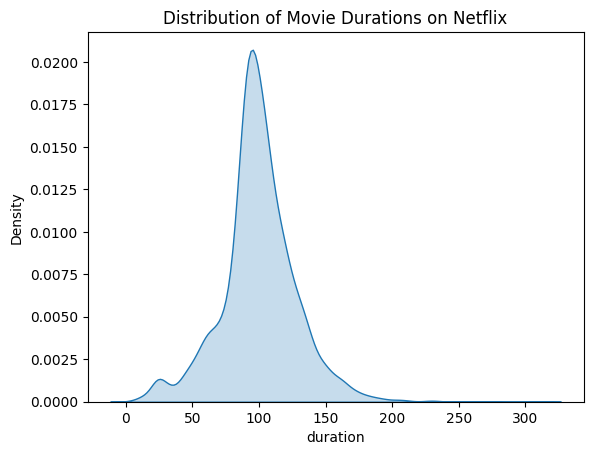

In [33]:
sns.kdeplot(data=netflix_movies['duration'], fill=True)


plt.title('Distribution of Movie Durations on Netflix')

plt.show()

In [34]:
average_duration = netflix_movies['duration'].mean()
print('The average duration of Movies on Netflix is', round(average_duration,2) ,'minutes.')

The average duration of Movies on Netflix is 99.58 minutes.


In [35]:
fig = px.histogram(netflix_movies, x='duration', title="Distribution of Movie Duration on Netflix", nbins = 30)
fig.update_xaxes(title_text="Duration(minutes)")
fig.show()

# 6. Who are the top 10 directors with the most content on netflix?

In [36]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teen
1,s2,TV Show,Blood & Water,Incomplete Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",Adult
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,Adult
3,s4,TV Show,Jailbirds New Orleans,Incomplete Data,No data,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",Adult
4,s5,TV Show,Kota Factory,Incomplete Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,Adult


In [37]:
director_count = df.groupby(by='director')['show_id'].count()
director_count

director
A. L. Vijay            2
A. Raajdheep           1
A. Salaam              1
A.R. Murugadoss        2
Aadish Keluskar        1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Name: show_id, Length: 4528, dtype: int64

In [38]:
top_directors = director_count.sort_values(ascending=False)
print("Top 10 directors with the most content on Netflix:")
print(top_directors.head(10))

Top 10 directors with the most content on Netflix:
director
Incomplete Data           2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: show_id, dtype: int64


In [39]:
top_directors[1:11]    

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          11
Name: show_id, dtype: int64

In [40]:
fig = px.bar(x=top_directors[1:11].index,
             y=top_directors[1:11].values,
             title="Top 10 Directors with the most content on Netflix")
fig.update_xaxes(title='Director')
fig.update_yaxes(title='Number of TV shows/movies')
fig.show()

# **Summary:**

**This Netflix EDA project analyzed the platform’s content library to uncover trends and insights. I found that movies dominate the catalog compared to TV shows, with a significant rise in content additions over recent years. The most popular genres include Drama, Comedy, and Documentaries. The United States leads in content production, followed by India and the United Kingdom. We also identified the most frequent directors and actors on Netflix and examined content durations. This analysis provides valuable insights into content strategy and regional preferences.**